# Introducción a la Ciencia de Datos: Tarea 1

Este notebook contiene el código de base para realizar la Tarea 1 del curso. Puede copiarlo en su propio repositorio y trabajar sobre el mismo.
Las **instrucciones para ejecutar el notebook** están en la [página inicial del repositorio](https://github.com/DonBraulio/introCD).

Se utiliza el lenguaje Python y la librería Pandas. Si no tiene ninguna familiaridad con la librería, se recomienda realizar algún tutorial introductorio (ver debajo).
También se espera que los alumnos sean proactivos a la hora de consultar las documentaciones de las librerías y del lenguaje, para entender el código provisto.
Además de los recursos provistos en la [página del curso](https://eva.fing.edu.uy/course/view.php?id=1378&section=1), los siguientes recursos le pueden resultar interesantes:
 - [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) y [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html): Son parte de la documentación en la página oficial de Pandas.
 - [Kaggle Learn](https://www.kaggle.com/learn): Incluye tutoriales de Python y Pandas.


Si desea utilizar el lenguaje R y está dispuesto a no utilizar (o traducir) este código de base, también puede hacerlo.

En cualquier caso, **se espera que no sea necesario revisar el código para corregir la tarea**, ya que todos los resultados y análisis relevantes deberían estar en el **informe en formato PDF**.

## Cargar bibliotecas (dependencias)
Recuerde instalar los requerimientos (`requirements.txt`) en el mismo entorno donde está ejecutando este notebook (ver [README](https://github.com/DonBraulio/introCD)).

In [1]:
from time import time
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lectura de Datos

In [2]:
# DataFrame con todas las obras:
df_works = pd.read_csv('../data/shakespeare/works.csv')

# Todos los párrafos de todas las obras
df_paragraphs = pd.read_csv('../data/shakespeare/paragraphs.csv')

# TODO: cargar el resto de las tablas
df_chapters = pd.read_csv('../data/shakespeare/chapters.csv')
df_characters = pd.read_csv('../data/shakespeare/characters.csv')

## Exploración de Datos

In [3]:
# Veamos las obras incluídas:

# x = 1:works; 2:chapters; 3:characters; 4:paragraphs
x = 1

if x == 1:
    display(df_works.head())
elif x == 2:
    display(df_chapters.head())
elif x == 3:
    display(df_characters.head())
else:
    display(df_paragraphs.head())


,Unnamed: 0,id,Title,LongTitle,Date,GenreType
0,0,1,Twelfth Night,"Twelfth Night, Or What You Will",1599,Comedy
1,1,2,All's Well That Ends Well,All's Well That Ends Well,1602,Comedy
2,2,3,Antony and Cleopatra,Antony and Cleopatra,1606,Tragedy
3,3,4,As You Like It,As You Like It,1599,Comedy
4,4,5,Comedy of Errors,The Comedy of Errors,1589,Comedy


In [4]:
df_paragraphs["PlainText"]

0        [Enter DUKE ORSINO, CURIO, and other Lords; Mu...
1        If music be the food of love, play on;\r\nGive...
2                               Will you go hunt, my lord?
3                                             What, Curio?
4                                                The hart.
                               ...                        
35460    That she is living,\r\nWere it but told you, s...
35461    You gods, look down\r\nAnd from your sacred vi...
35462    There's time enough for that;\r\nLest they des...
35463    O, peace, Paulina!\r\nThou shouldst a husband ...
35464                                             [Exeunt]
Name: PlainText, Length: 35465, dtype: object

In [5]:
# Quiero ver si tengo datos faltantes en alguna columna de mis tablas
df_works_nan = df_works.isnull().any()
df_paragraphs_nan = df_paragraphs.isnull().any()
df_chapters_nan = df_chapters.isnull().any()
df_characters_nan = df_characters.isnull().any()

columns_with_nan = df_works_nan[df_works_nan].index.tolist()
print("Columnas con valores nulos en works:", columns_with_nan)

columns_with_nan = df_paragraphs_nan[df_paragraphs_nan].index.tolist()
print("Columnas con valores nulos en paragraphs:", columns_with_nan)

columns_with_nan = df_chapters_nan[df_chapters_nan].index.tolist()
print("Columnas con valores nulos en chapters:", columns_with_nan)

columns_with_nan = df_characters_nan[df_characters_nan].index.tolist()
print("Columnas con valores nulos en characters:", columns_with_nan)

Columnas con valores nulos en works: []
Columnas con valores nulos en paragraphs: []
Columnas con valores nulos en chapters: []
Columnas con valores nulos en characters: ['Abbrev', 'Description']


In [6]:
# Quiero ver cuantos valores nulos hay respecto al total de valores 
# Valores nulos en cada columna
null_counts = df_characters.isnull().sum()
print("Número de valores nulos en cada columna:")
print(null_counts)

# Total de valores (nulos y no nulos) en cada columna
total_values = df_characters.shape[0]
print("Número total de valores (nulos y no nulos) en cada columna:")
print(total_values)

# Calcular el porcentaje de valores nulos respecto al total de valores en cada columna
null_percentage = (null_counts / total_values) * 100
print("Porcentaje de valores nulos en cada columna:")
print(null_percentage)


Número de valores nulos en cada columna:
Unnamed: 0       0
id               0
CharName         0
Abbrev           5
Description    646
dtype: int64
Número total de valores (nulos y no nulos) en cada columna:
1266
Porcentaje de valores nulos en cada columna:
Unnamed: 0      0.000000
id              0.000000
CharName        0.000000
Abbrev          0.394945
Description    51.026856
dtype: float64


In [7]:
df_paragraphs.head()

,Unnamed: 0,id,ParagraphNum,PlainText,character_id,chapter_id
0,0,630863,3,"[Enter DUKE ORSINO, CURIO, and other Lords; Mu...",1261,18704
1,1,630864,4,"If music be the food of love, play on;\r\nGive...",840,18704
2,2,630865,19,"Will you go hunt, my lord?",297,18704
3,3,630866,20,"What, Curio?",840,18704
4,4,630867,21,The hart.,297,18704


(array([ 1.,  3.,  3., ...,  1., 11.,  4.]),
 array([1.00000000e+00, 1.99921011e+00, 2.99842022e+00, ...,
        1.26400158e+03, 1.26500079e+03, 1.26600000e+03]),
 <BarContainer object of 1266 artists>)

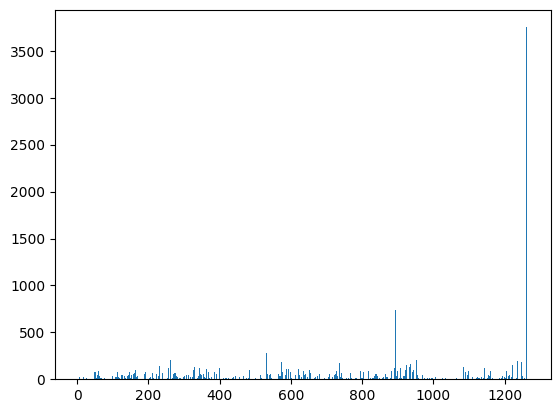

In [8]:
plt.hist(df_paragraphs['character_id'], bins = len(df_characters['id']))

In [9]:
contar = df_paragraphs['character_id'].value_counts()
contar

character_id
1261    3751
894      733
393      471
573      377
559      358
        ... 
264        1
32         1
41         1
138        1
555        1
Name: count, Length: 1220, dtype: int64

In [10]:
indices = df_characters[df_characters['id'].isin(contar.index[:5])].index
df_characters.loc[indices].sort_values(by='id', key=lambda x: contar[x])

,Unnamed: 0,id,CharName,Abbrev,Description
558,558,559,Hamlet,Ham,son of the former king and nephew to the prese...
572,572,573,Henry V,HENRY5,"Prince, King of England"
392,392,393,Falstaff,FALSTAFF,Sir John Falstaff
893,893,894,Poet,Poet,the voice of Shakespeare's poetry
1260,1260,1261,(stage directions),xxx,NaN


In [11]:
df_works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  43 non-null     int64 
 1   id          43 non-null     int64 
 2   Title       43 non-null     object
 3   LongTitle   43 non-null     object
 4   Date        43 non-null     int64 
 5   GenreType   43 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.1+ KB


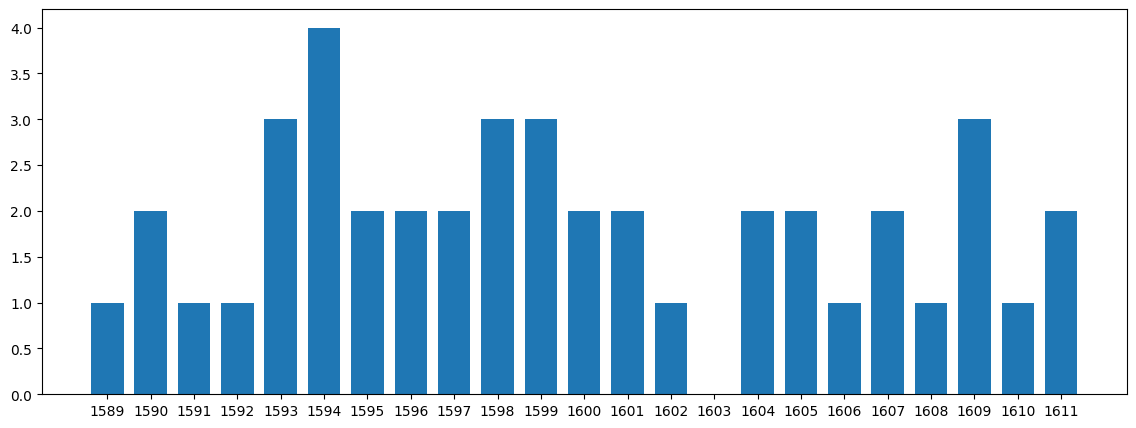

In [12]:
plt.figure(figsize = (14,5))
plt.hist(df_works['Date'], bins = df_works['Date'].max() - df_works['Date'].min(), align='left', rwidth = 0.75)
plt.xticks(range(df_works['Date'].min(), df_works['Date'].max()))
plt.show()

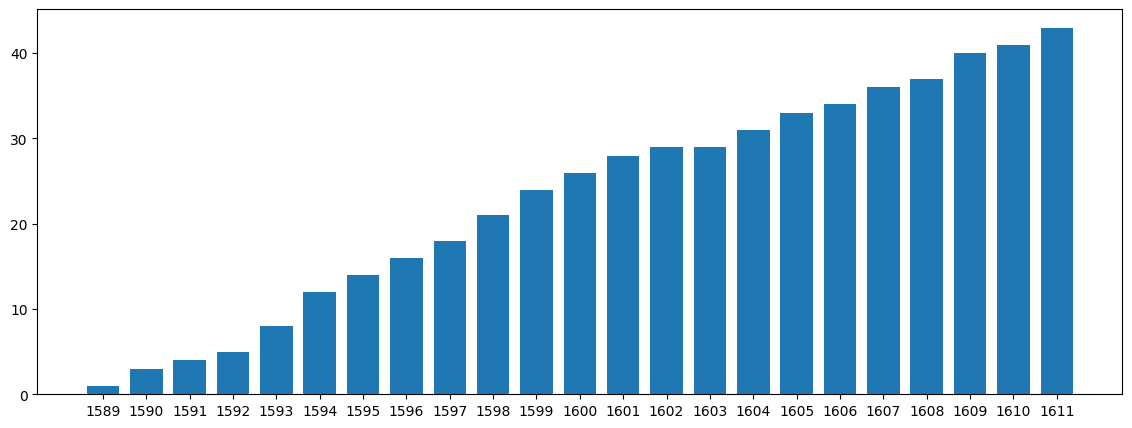

In [13]:
plt.figure(figsize = (14,5))
plt.hist(df_works['Date'], bins = df_works['Date'].max() - df_works['Date'].min(), cumulative = True, align='left', rwidth = 0.75)
plt.xticks(range(df_works['Date'].min(), df_works['Date'].max()))
plt.show()

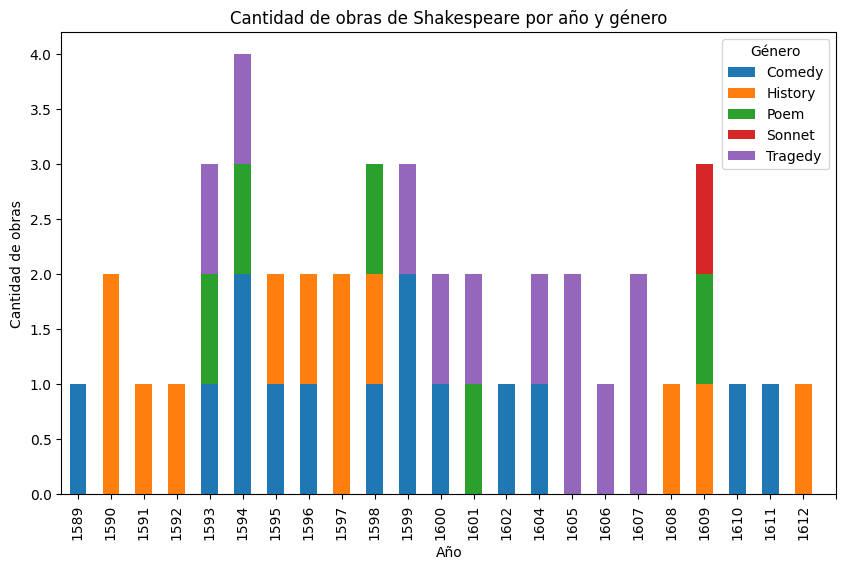

In [14]:
# Nuevo registro que deseas agregar
nuevo_registro = {
    'Title': None,
    'GenreType': None,
    'Date': 1603,
    'Author': None,
    'PlayLength': None,
    'Acts': 5
}

# Convertir el diccionario a un DataFrame de una sola fila
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Crear un nuevo DataFrame df_works2 concatenando df_works y nuevo_registro_df
df_works2 = pd.concat([df_works, nuevo_registro_df], ignore_index=True)


conteo_por_genero = df_works2.groupby(['Date', 'GenreType']).size().unstack(fill_value=0)
# Crea el histograma apilado

conteo_por_genero.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.bar(conteo_por_genero,
# Personaliza el gráfico
plt.title('Cantidad de obras de Shakespeare por año y género')
plt.xlabel('Año')
plt.ylabel('Cantidad de obras')
plt.legend(title='Género')

plt.xticks(ticks=np.arange(0, 1613-1589, 1, dtype=int))
#plt.xlim(1588,1613)

# Guardar el gráfico como una imagen .jpg
plt.savefig('shakespeare_works_by_year_and_genre.jpg', format='jpg', dpi=300)

# Muestra el gráfico
plt.show()

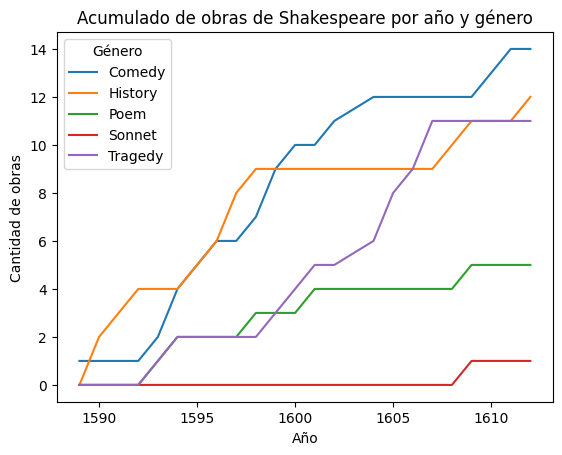

In [15]:
conteo_por_genero.cumsum().plot()

# Personaliza el gráfico
plt.title('Acumulado de obras de Shakespeare por año y género')
plt.xlabel('Año')
plt.ylabel('Cantidad de obras')
plt.legend(title='Género')

# Guardar el gráfico como una imagen .jpg
plt.savefig('shakespeare_works_by_year_and_genre.jpg', format='jpg', dpi=300)

# Muestra el gráfico
plt.show()

## Limpieza de Texto y Conteo de Palabras

In [16]:
def clean_text(df, column_name):
    # Convertir todo a minúsculas
    result = df[column_name].str.lower()

    # Quitar signos de puntuación y cambiarlos por espacios (" ")
    # TODO: completar signos de puntuación faltantes
    for punc in ["[", "\n", ","]:
        result = result.str.replace(punc, " ")
    return result

# Creamos una nueva columna CleanText a partir de PlainText
df_paragraphs["CleanText"] = clean_text(df_paragraphs, "PlainText")

# Veamos la diferencia
df_paragraphs[["PlainText", "CleanText"]]

,PlainText,CleanText
0,"[Enter DUKE ORSINO, CURIO, and other Lords; Mu...",enter duke orsino curio and other lords; mu...
1,"If music be the food of love, play on;\r\nGive...",if music be the food of love play on;\r give ...
2,"Will you go hunt, my lord?",will you go hunt my lord?
3,"What, Curio?",what curio?
4,The hart.,the hart.
...,...,...
35460,"That she is living,\r\nWere it but told you, s...",that she is living \r were it but told you sh...
35461,"You gods, look down\r\nAnd from your sacred vi...",you gods look down\r and from your sacred via...
35462,There's time enough for that;\r\nLest they des...,there's time enough for that;\r lest they desi...
35463,"O, peace, Paulina!\r\nThou shouldst a husband ...",o peace paulina!\r thou shouldst a husband t...


In [17]:
# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_paragraphs["WordList"] = df_paragraphs["CleanText"].str.split()

# Veamos la nueva columna creada
# Notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_paragraphs[["CleanText", "WordList"]]

,CleanText,WordList
0,enter duke orsino curio and other lords; mu...,"[enter, duke, orsino, curio, and, other, lords..."
1,if music be the food of love play on;\r give ...,"[if, music, be, the, food, of, love, play, on;..."
2,will you go hunt my lord?,"[will, you, go, hunt, my, lord?]"
3,what curio?,"[what, curio?]"
4,the hart.,"[the, hart.]"
...,...,...
35460,that she is living \r were it but told you sh...,"[that, she, is, living, were, it, but, told, y..."
35461,you gods look down\r and from your sacred via...,"[you, gods, look, down, and, from, your, sacre..."
35462,there's time enough for that;\r lest they desi...,"[there's, time, enough, for, that;, lest, they..."
35463,o peace paulina!\r thou shouldst a husband t...,"[o, peace, paulina!, thou, shouldst, a, husban..."


In [18]:
# Nuevo dataframe: cada fila ya no es un párrafo, sino una sóla palabra
df_words = df_paragraphs.explode("WordList")

# Quitamos estas columnas redundantes
df_words.drop(columns=["CleanText", "PlainText"], inplace=True)

# Renombramos la columna WordList -> word
df_words.rename(columns={"WordList": "word"}, inplace=True)

# Verificar que el número de filas es mucho mayor
df_words

,Unnamed: 0,id,ParagraphNum,character_id,chapter_id,word
0,0,630863,3,1261,18704,enter
0,0,630863,3,1261,18704,duke
0,0,630863,3,1261,18704,orsino
0,0,630863,3,1261,18704,curio
0,0,630863,3,1261,18704,and
...,...,...,...,...,...,...
35463,35463,666326,3483,667,19648,dissever'd:
35463,35463,666326,3483,667,19648,hastily
35463,35463,666326,3483,667,19648,lead
35463,35463,666326,3483,667,19648,away.


In [19]:
conteo_palabras = df_words['word'].value_counts()
conteo_palabras

word
the            28824
and            27195
i              20412
to             19973
of             17023
               ...  
confessor's        1
makings            1
devoutly.          1
--flew             1
dissever'd:        1
Name: count, Length: 53010, dtype: int64

In [20]:
df_words['word'].apply(list)

0                          [e, n, t, e, r]
0                             [d, u, k, e]
0                       [o, r, s, i, n, o]
0                          [c, u, r, i, o]
0                                [a, n, d]
                       ...                
35463    [d, i, s, s, e, v, e, r, ', d, :]
35463                [h, a, s, t, i, l, y]
35463                         [l, e, a, d]
35463                      [a, w, a, y, .]
35464                [e, x, e, u, n, t, ]]
Name: word, Length: 884544, dtype: object

In [21]:
df_letras = df_words['word'].apply(list).explode('word')
df_letras.value_counts()

word
e    437245
t    326412
o    300425
a    274230
h    239565
i    239313
s    237218
n    231153
r    222604
l    159163
d    144928
u    122392
m    106411
y     93040
w     90678
f     77668
c     75932
g     65004
b     57132
p     53067
.     38134
v     36774
k     32960
'     27819
;     17030
:     12474
?     10652
!      9471
-      9425
]      6175
x      4853
j      4009
q      3195
z      1241
(        53
)        52
&        47
"        13
2         4
4         2
5         2
8         2
6         2
1         2
3         1
7         1
9         1
0         1
Name: count, dtype: int64

In [22]:
def clean_text(df, column_name):
    # Convertir todo a minúsculas
    result = df[column_name].str.lower()

    # Quitar signos de puntuación y cambiarlos por espacios (" ")
    # TODO: completar signos de puntuación faltantes
    for punc in ["[", "]", "\n", "\r", ",", ";", "?", ".", "!", ":", "'", "-", "_", "(", ")", "&", '"', "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]:
        result = result.str.replace(punc, " ")
    return result

# Creamos una nueva columna CleanText a partir de PlainText
df_paragraphs["CleanText"] = clean_text(df_paragraphs, "PlainText")

# Veamos la diferencia
df_paragraphs[["PlainText", "CleanText"]]

,PlainText,CleanText
0,"[Enter DUKE ORSINO, CURIO, and other Lords; Mu...",enter duke orsino curio and other lords mu...
1,"If music be the food of love, play on;\r\nGive...",if music be the food of love play on give m...
2,"Will you go hunt, my lord?",will you go hunt my lord
3,"What, Curio?",what curio
4,The hart.,the hart
...,...,...
35460,"That she is living,\r\nWere it but told you, s...",that she is living were it but told you sho...
35461,"You gods, look down\r\nAnd from your sacred vi...",you gods look down and from your sacred vial...
35462,There's time enough for that;\r\nLest they des...,there s time enough for that lest they desir...
35463,"O, peace, Paulina!\r\nThou shouldst a husband ...",o peace paulina thou shouldst a husband ta...


In [23]:
# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_paragraphs["WordList"] = df_paragraphs["CleanText"].str.split()

# Veamos la nueva columna creada
# Notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_paragraphs[["CleanText", "WordList"]]

,CleanText,WordList
0,enter duke orsino curio and other lords mu...,"[enter, duke, orsino, curio, and, other, lords..."
1,if music be the food of love play on give m...,"[if, music, be, the, food, of, love, play, on,..."
2,will you go hunt my lord,"[will, you, go, hunt, my, lord]"
3,what curio,"[what, curio]"
4,the hart,"[the, hart]"
...,...,...
35460,that she is living were it but told you sho...,"[that, she, is, living, were, it, but, told, y..."
35461,you gods look down and from your sacred vial...,"[you, gods, look, down, and, from, your, sacre..."
35462,there s time enough for that lest they desir...,"[there, s, time, enough, for, that, lest, they..."
35463,o peace paulina thou shouldst a husband ta...,"[o, peace, paulina, thou, shouldst, a, husband..."


In [24]:
# Nuevo dataframe: cada fila ya no es un párrafo, sino una sóla palabra
df_words = df_paragraphs.explode("WordList")

# Quitamos estas columnas redundantes
df_words.drop(columns=["CleanText", "PlainText"], inplace=True)

# Renombramos la columna WordList -> word
df_words.rename(columns={"WordList": "word"}, inplace=True)

# Verificar que el número de filas es mucho mayor
df_words

,Unnamed: 0,id,ParagraphNum,character_id,chapter_id,word
0,0,630863,3,1261,18704,enter
0,0,630863,3,1261,18704,duke
0,0,630863,3,1261,18704,orsino
0,0,630863,3,1261,18704,curio
0,0,630863,3,1261,18704,and
...,...,...,...,...,...,...
35463,35463,666326,3483,667,19648,d
35463,35463,666326,3483,667,19648,hastily
35463,35463,666326,3483,667,19648,lead
35463,35463,666326,3483,667,19648,away


 ## Personajes con mayor cantidad de palabras

In [25]:
# Agregamos el nombre de los personajes
# TODO: des-comentar luego de cargar df_characters
df_words = pd.merge(df_words, df_characters[["id", "CharName"]], left_on="character_id", right_on="id")
df_words

,Unnamed: 0,id_x,ParagraphNum,character_id,chapter_id,word,id_y,CharName
0,0,630863,3,1261,18704,enter,1261,(stage directions)
1,0,630863,3,1261,18704,duke,1261,(stage directions)
2,0,630863,3,1261,18704,orsino,1261,(stage directions)
3,0,630863,3,1261,18704,curio,1261,(stage directions)
4,0,630863,3,1261,18704,and,1261,(stage directions)
...,...,...,...,...,...,...,...,...
909344,35463,666326,3483,667,19648,d,667,Leontes
909345,35463,666326,3483,667,19648,hastily,667,Leontes
909346,35463,666326,3483,667,19648,lead,667,Leontes
909347,35463,666326,3483,667,19648,away,667,Leontes


In [26]:
conteo_palabras = df_words['word'].value_counts()
df_conteo_palabras = pd.DataFrame({
    'palabras': conteo_palabras.index,
    'conteo': conteo_palabras.values
})


In [27]:
df_conteo_palabras

,palabras,conteo
0,the,28933
1,and,27312
2,i,23006
3,to,20820
4,of,17179
...,...,...
23757,erskip,1
23758,associated,1
23759,erborne,1
23760,franchises,1


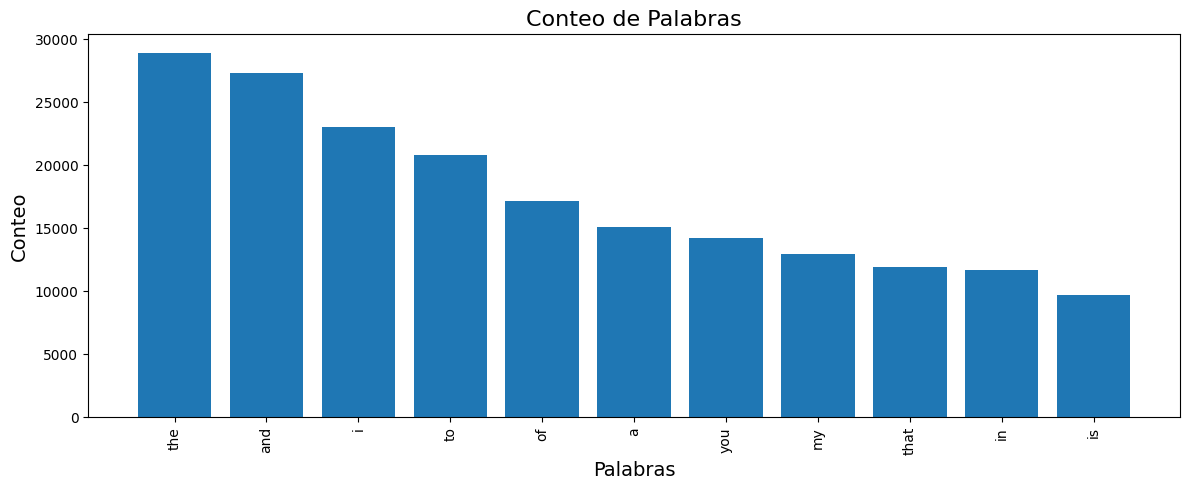

In [28]:
plt.figure(figsize = (12,5))
plt.bar(df_conteo_palabras['palabras'].loc[:10], df_conteo_palabras['conteo'].loc[:10])

plt.xlabel('Palabras', fontsize=14)
plt.ylabel('Conteo', fontsize=14)
plt.title('Conteo de Palabras', fontsize=16)

plt.xticks(rotation=90)

# Ajustar automáticamente el diseño para evitar el corte de etiquetas
plt.tight_layout()

# Guardar la figura como un archivo JPG
plt.savefig('conteo_palabras.jpg', format='jpg', dpi=300)
plt.show()

In [29]:
# TODO:
# - des-comentar luego de hacer el merge
# - Encuentra algún problema en los resultados?

words_per_character = df_words.groupby("CharName")["word"].count().sort_values(ascending=False)
words_per_character

CharName
Poet                  50762
(stage directions)    16443
Henry V               15428
Falstaff              14906
Hamlet                12291
                      ...  
Philip                    3
Nicholas                  2
Joseph                    2
Taurus                    2
Thieves                   1
Name: word, Length: 925, dtype: int64

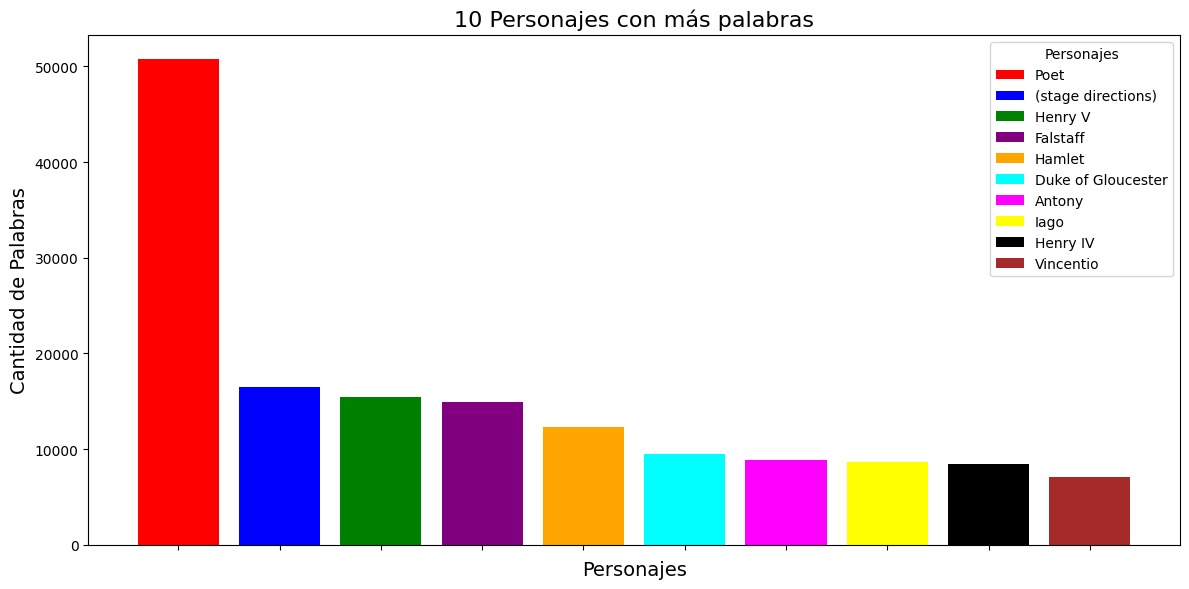

In [30]:
# Ejemplo: 10 personajes con más palabras
char_show = words_per_character[:10]

# Lista de colores (puedes personalizarla según tus preferencias)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'brown']

# Crear el gráfico de barras con colores diferentes
plt.figure(figsize=(12, 6))

# Lista para mantener las handles y labels para la leyenda
handles = []
labels = []

for i, (index, value) in enumerate(char_show.items()):
    bar = plt.bar(i, value, color=colors[i % len(colors)])
    handles.append(bar)
    labels.append(index)

# Eliminar los nombres del eje x
plt.xticks(range(len(char_show)), [''] * len(char_show))

# Añadir etiquetas y título
plt.xlabel('Personajes', fontsize=14)
plt.ylabel('Cantidad de Palabras', fontsize=14)
plt.title('10 Personajes con más palabras', fontsize=16)

# Añadir la leyenda
plt.legend(handles, labels, title='Personajes')

# Ajustar el diseño para evitar el corte de etiquetas
plt.tight_layout()

plt.savefig('palabras_personajes1.jpg', format='jpg', dpi=300)

# Mostrar el gráfico
plt.show()

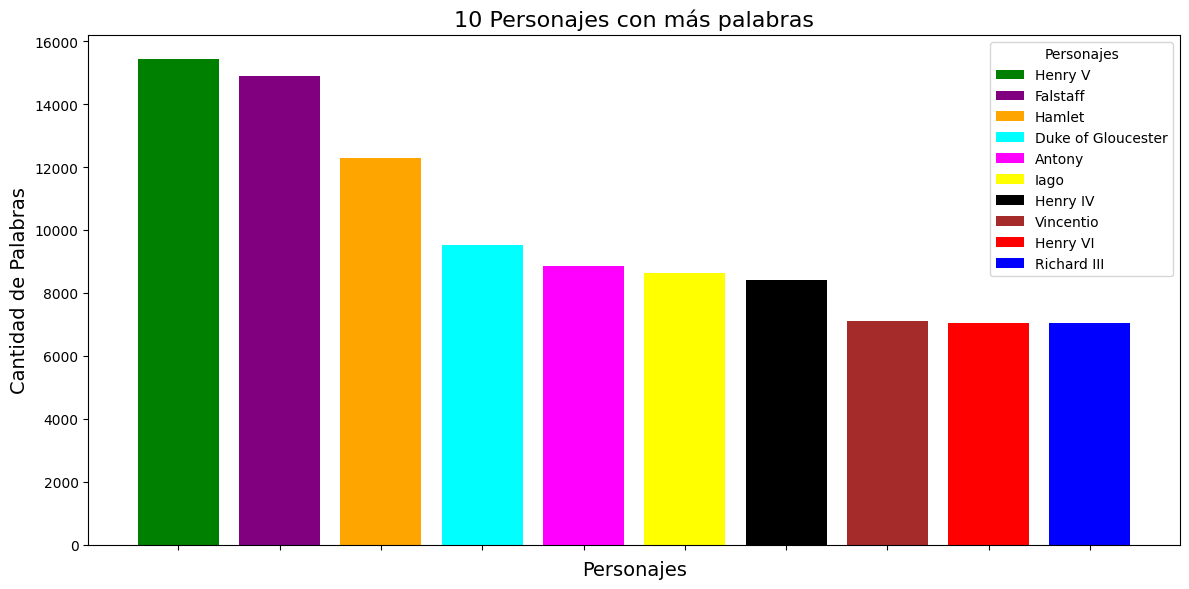

In [31]:
# Ejemplo: 10 personajes con más palabras
char_show = words_per_character[2:12]

# Lista de colores (puedes personalizarla según tus preferencias)
colors = ['green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'red', 'blue']

# Crear el gráfico de barras con colores diferentes
plt.figure(figsize=(12, 6))

# Lista para mantener las handles y labels para la leyenda
handles = []
labels = []

for i, (index, value) in enumerate(char_show.items()):
    bar = plt.bar(i, value, color=colors[i % len(colors)])
    handles.append(bar)
    labels.append(index)

# Eliminar los nombres del eje x
plt.xticks(range(len(char_show)), [''] * len(char_show))

# Añadir etiquetas y título
plt.xlabel('Personajes', fontsize=14)
plt.ylabel('Cantidad de Palabras', fontsize=14)
plt.title('10 Personajes con más palabras', fontsize=16)

# Añadir la leyenda
plt.legend(handles, labels, title='Personajes')

# Ajustar el diseño para evitar el corte de etiquetas
plt.tight_layout()

plt.savefig('palabras_personajes2.jpg', format='jpg', dpi=300)

# Mostrar el gráfico
plt.show()